# KNN

K-nearest neighbors is a supervised machine learning algorithms, which classifys data. When data is in clusters, and you have a new point and want to indetify what cluster it belongds to, KNN is very useful. K is a function that you chose, so when you set K = 3, it classfys data by looking at 3 closest neighbors, so if 2 are blue and 1 is red(even if red is the closest), the new point is blue. It does this by computing distance, using hypotenous of traingle, and then finds smallest distances.


In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter

points = {"blue": [[2,4, 3], [1,3, 5], [2,3, 1], [3,2, 3], [2,1,6]],
        "red": [[5,6, 5], [4,5, 2], [4,6, 1], [6,6, 1], [5,4, 6], [10,10, 4]] }

new_points = [5, 5, 2]

red


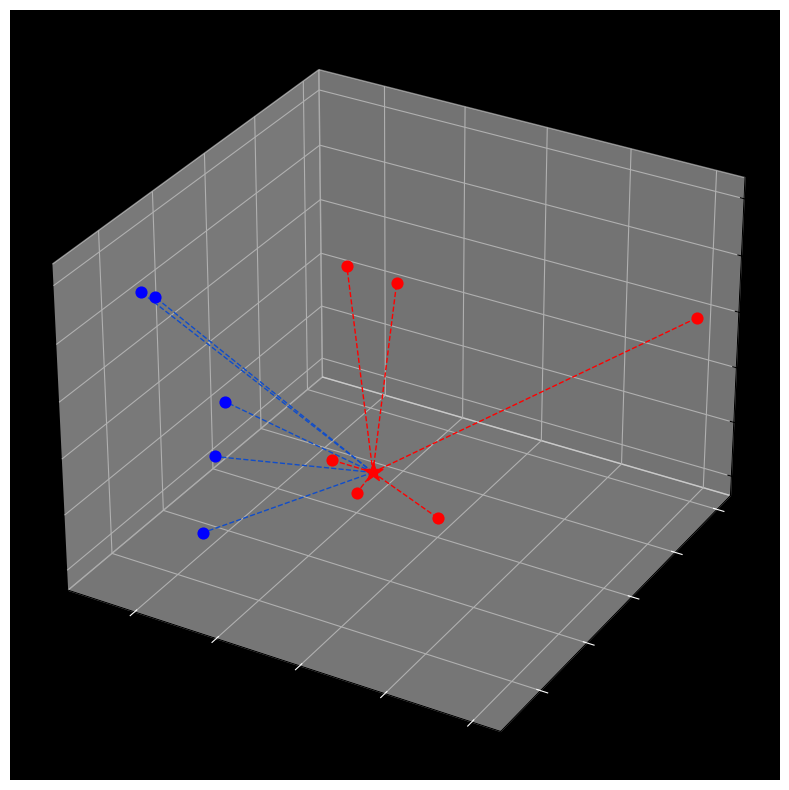

In [33]:
def euclidean_distance(p,q):
    return np.sqrt(np.sum((np.array(p) - np.array(q))) ** 2) #NP, turns matrix so this is matrix subtraction


class KNearestNeighbors:
     
    def __init__(self, k = 3):
        self.k = k
        self.point = None

    def fit(self, points):
        self.points = points

    def predict(self, new_point):

        distances = []

        for category in self.points:
            for point in self.points[category]:
                distance = euclidean_distance(point, new_point)
                distances.append([distance, category])

        categories = [category[1] for category in sorted(distances)[:self.k]]
        result = Counter(categories).most_common(1)[0][0]
        return result

clf = KNearestNeighbors()
clf.fit(points)
print(clf.predict(new_points))


# Visulize

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(projection="3d")
ax.grid(True, color = "#323232")
ax.set_facecolor("black")
#ax.figure.set_facecolor("#1212121")
ax.tick_params(axis="x", color = "white")
ax.tick_params(axis="y", color = "white")

for point in points["blue"]:
    ax.scatter(point[0], point[1], point[2], color = "blue", s = 60)

for point in points["red"]:
    ax.scatter(point[0], point[1], point[2], color = "red", s = 60)


new_class = clf.predict(new_points)
color = "red" if new_class == "red" else "blue"
ax.scatter(new_points[0], new_points[1], new_points[2],  color = color, marker="*", s=200, zorder=100)



for point in points["blue"]:
    ax.plot([new_points[0], point[0]],  [new_points[1], point[1]], [new_points[2], point[2]], color = "#104DCA", linestyle="--", linewidth = 1 )

for point in points["red"]:
    ax.plot([new_points[0], point[0]], [new_points[1], point[1]], [new_points[2], point[2]], color = "#FF0000" , linestyle="--", linewidth = 1 )
plt.show()
